<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Train-losses" data-toc-modified-id="Train-losses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train losses</a></span><ul class="toc-item"><li><span><a href="#Train-loss-stats-across-user-training" data-toc-modified-id="Train-loss-stats-across-user-training-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train loss stats across user training</a></span><ul class="toc-item"><li><span><a href="#All-statistics" data-toc-modified-id="All-statistics-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>All statistics</a></span></li><li><span><a href="#Mean" data-toc-modified-id="Mean-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Mean</a></span></li><li><span><a href="#Mean-compared-to-minimum" data-toc-modified-id="Mean-compared-to-minimum-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Mean compared to minimum</a></span></li><li><span><a href="#Mean-compared-to-median" data-toc-modified-id="Mean-compared-to-median-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Mean compared to median</a></span></li><li><span><a href="#Mean-between-lower-and-upper-quartile" data-toc-modified-id="Mean-between-lower-and-upper-quartile-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Mean between lower and upper quartile</a></span></li></ul></li><li><span><a href="#Separate-train-loss-plots" data-toc-modified-id="Separate-train-loss-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Separate train loss plots</a></span><ul class="toc-item"><li><span><a href="#First-3-users" data-toc-modified-id="First-3-users-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>First 3 users</a></span></li><li><span><a href="#Unusual-spike-in-train-loss" data-toc-modified-id="Unusual-spike-in-train-loss-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Unusual spike in train loss</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [170]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
#OS libs
import os
import sys
from pathlib import Path
from io import StringIO
# File management
from util_functions.file_management import (filter_by, sort_by, all_user_name_id,
                                            split_pred, split_data, split_loss)
from util_functions.plot_loss import (get_train_losses, plot_single_train_loss,
                                      plot_train_loss_stats)
#Data handling libs
import pandas as pd
from tqdm import tqdm
from chess.pgn import read_game, BaseVisitor
import chess.engine

data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
losses_folder = os.path.join(os.getcwd(),'dt_chess','training_losses')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_predictions')
pred_files = os.listdir(dt_pred_folder)

# Train losses

## Train loss stats across user training

In [2]:
# get user-id combos
user_id_dict, id_user_dict = all_user_name_id(data_folder)
# get loss files
loss_df = get_train_losses(losses_folder, user_id_dict)
loss_stats = loss_df.describe().T
display(loss_stats)

,count,mean,std,min,25%,50%,75%,max
1,2355.0,4.349157,1.041613,2.899043,3.459117,4.044686,5.189452,8.473842
2,2469.0,2.781740,0.282488,2.295131,2.562051,2.724779,2.955228,3.947716
3,1818.0,2.526023,0.241666,2.050265,2.335243,2.487635,2.684372,3.486488
4,2266.0,2.456813,0.222907,2.053460,2.284643,2.417137,2.594197,3.317260
5,2161.0,2.384929,0.211359,1.953685,2.219486,2.348173,2.517262,3.146551
...,...,...,...,...,...,...,...,...
396,6086.0,2.159395,0.114488,1.874248,2.082375,2.141444,2.216713,3.150865
397,7646.0,2.172492,0.108046,1.905222,2.101755,2.157852,2.223188,3.095607
398,12497.0,2.327749,0.096930,2.023585,2.265025,2.318158,2.378081,3.143858
399,12327.0,2.209992,0.078373,1.979347,2.156726,2.203826,2.254922,2.772516


### All statistics

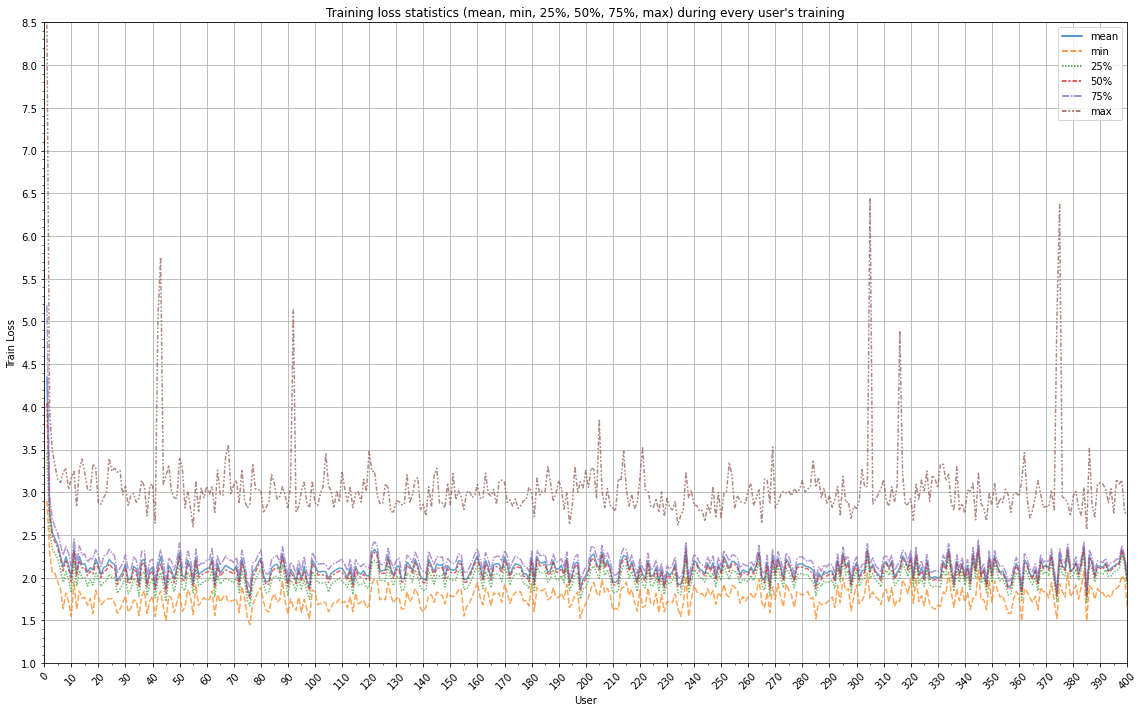

In [107]:
%matplotlib inline
plot_train_loss_stats(loss_stats, ['mean', 'min', '25%', '50%', '75%', 'max'])

### Mean

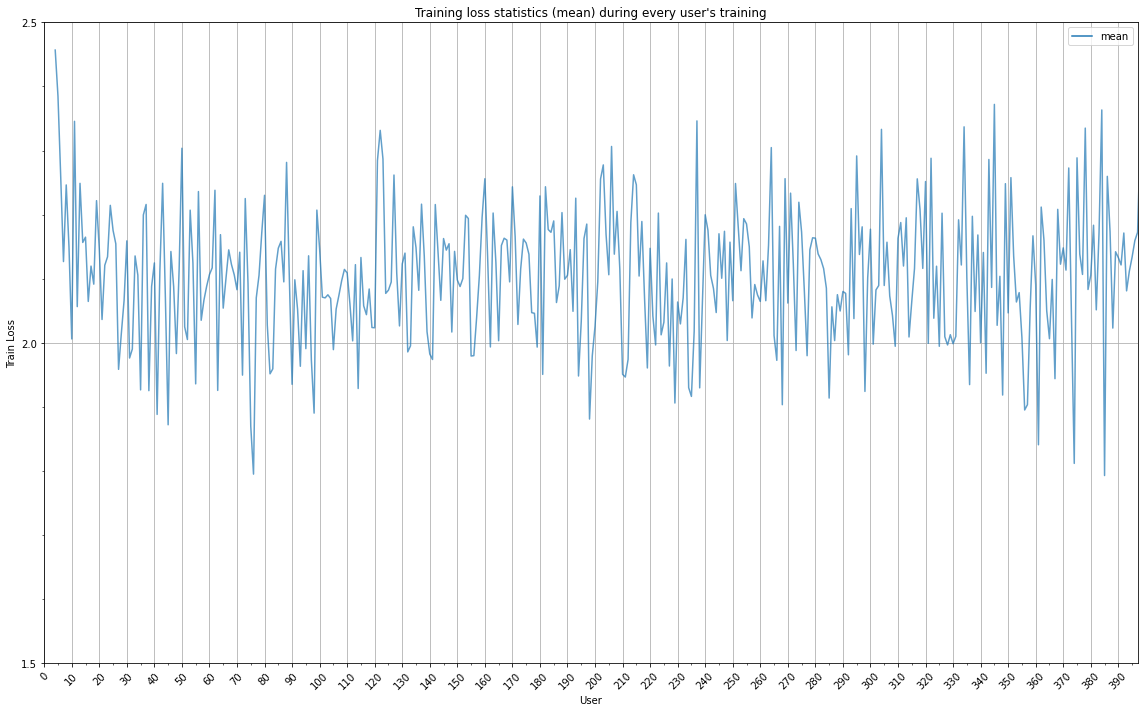

In [105]:
%matplotlib inline
plot_train_loss_stats(loss_stats[3:], ['mean'])

### Mean compared to minimum

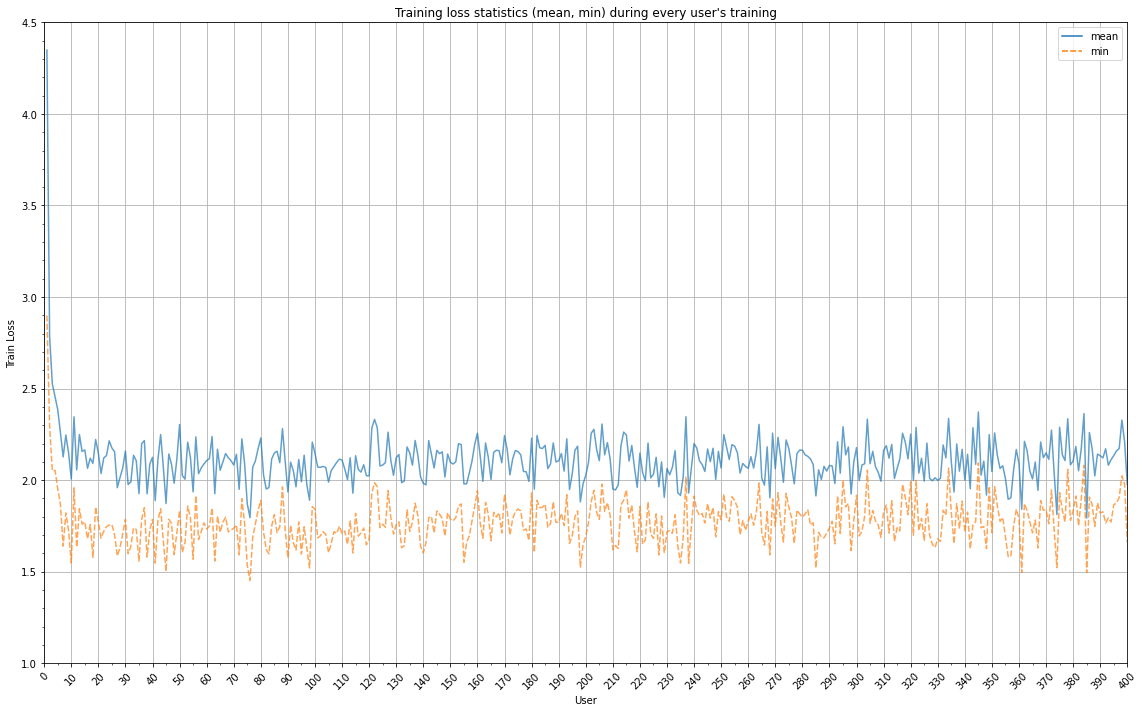

In [104]:
%matplotlib inline
plot_train_loss_stats(loss_stats, ['mean','min'])

### Mean compared to median

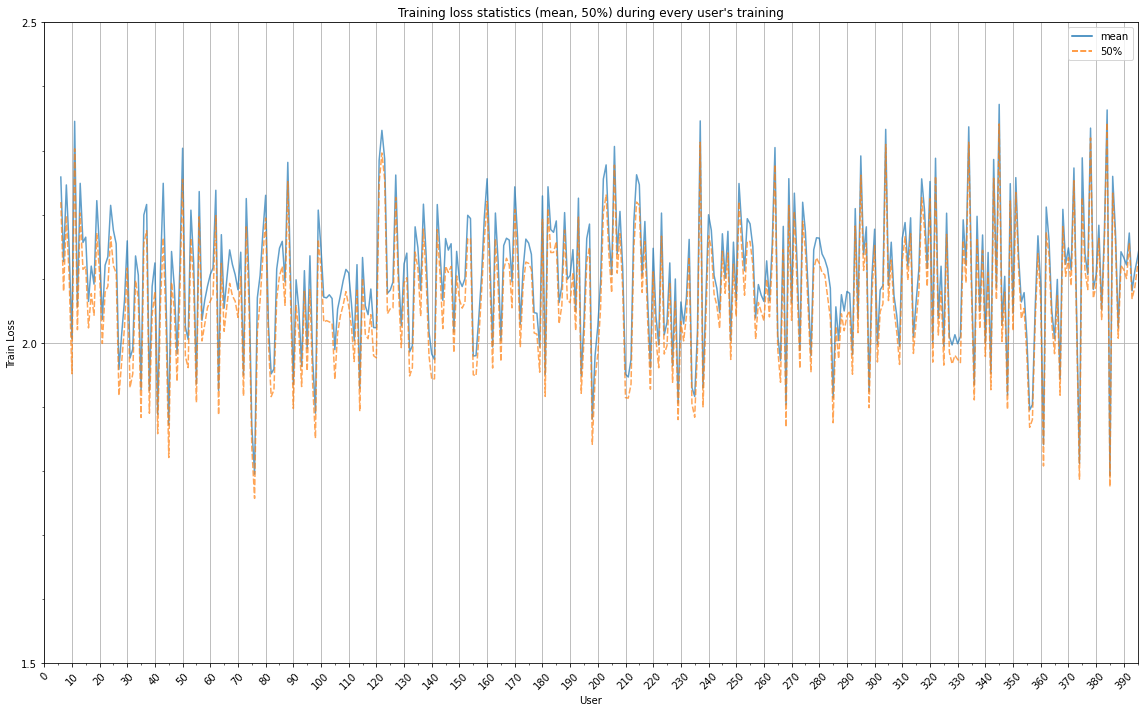

In [109]:
%matplotlib inline
plot_train_loss_stats(loss_stats[5:], ['mean','50%'])

### Mean between lower and upper quartile

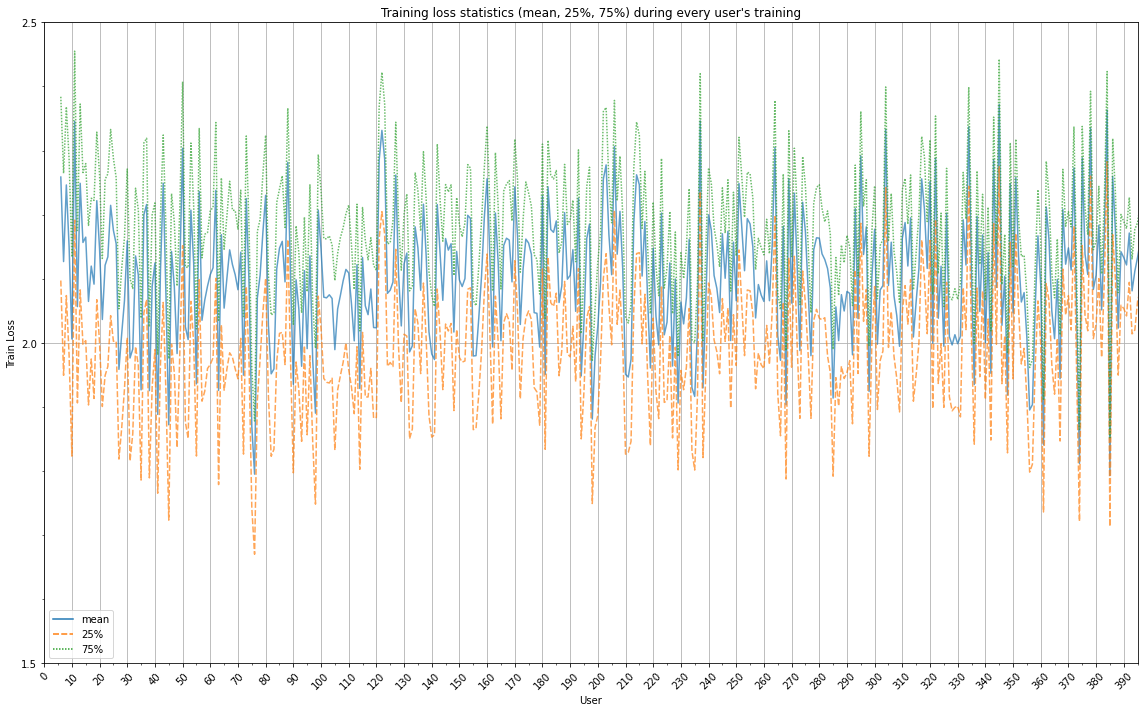

In [5]:
%matplotlib inline
plot_train_loss_stats(loss_stats[5:], ['mean','25%','75%'])

## Separate train loss plots

### First 3 users

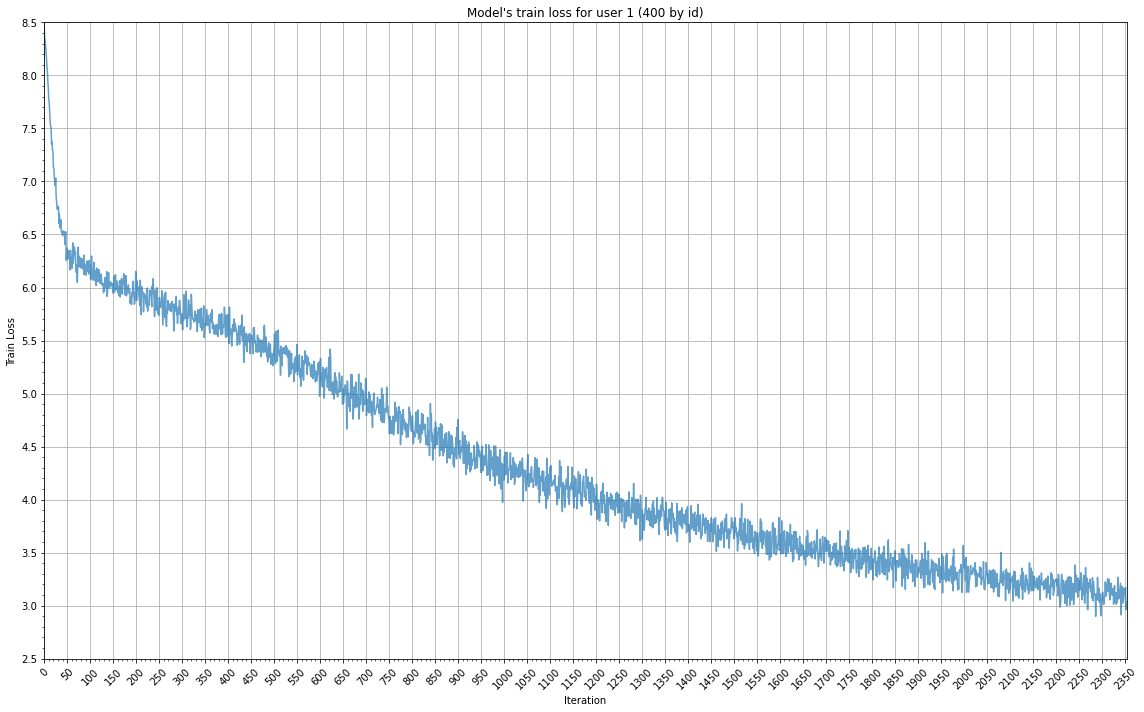

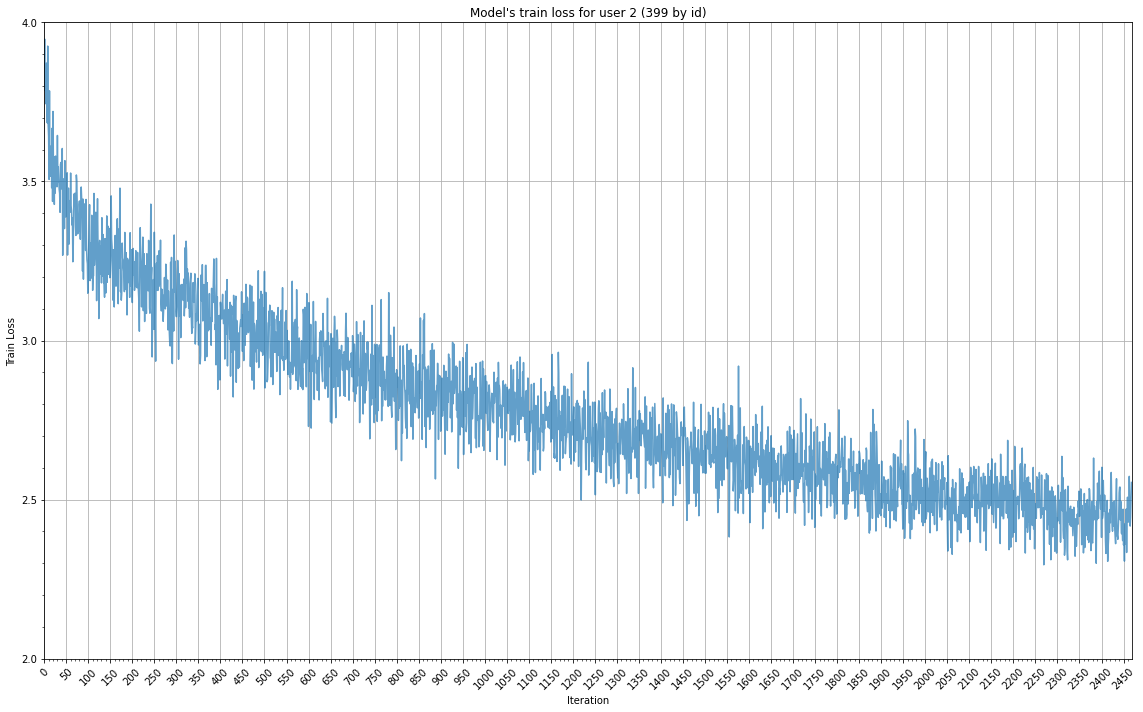

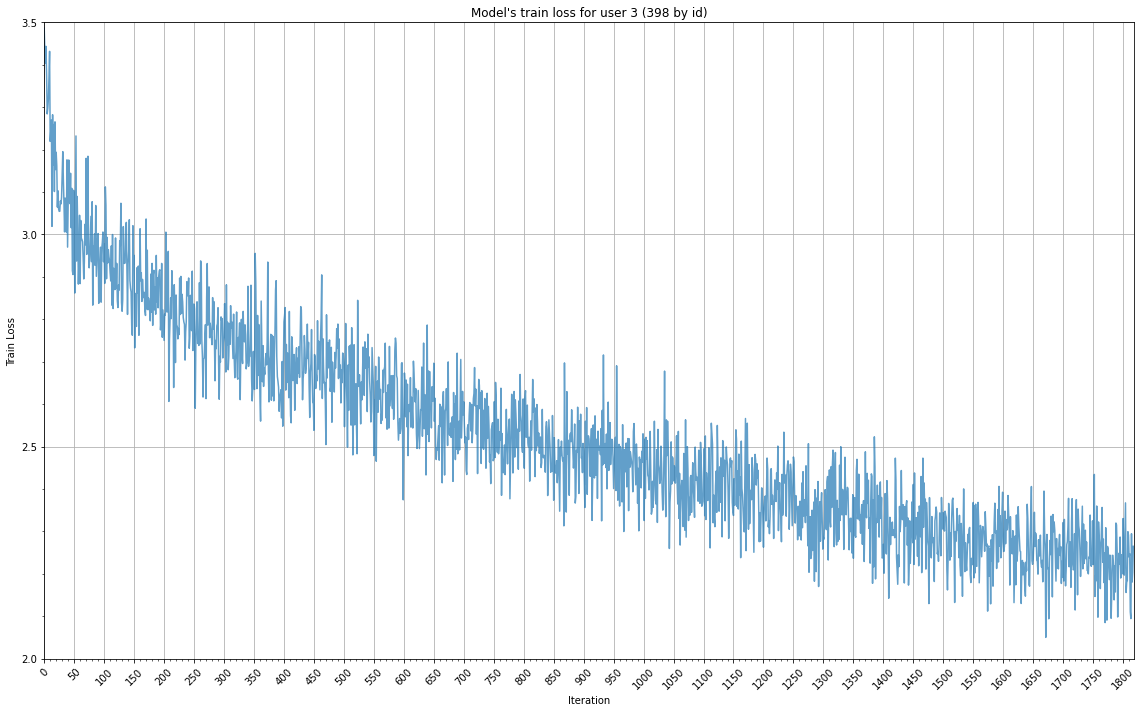

In [132]:
%matplotlib inline
for column in [1, 2, 3]:
    plot_single_train_loss(loss_df[column].dropna(), user_num = column)

### Unusual spike in train loss

In [114]:
high_max = loss_stats[loss_stats['max'] > 4]
high_max.index

Int64Index([1, 42, 43, 92, 305, 316, 374, 375], dtype='int64')

In [131]:
# show last 5 iterations
last_list = []
for i in high_max.index:
    last_list.append(loss_df[i].dropna()[-5:].reset_index(drop=True))
pd.DataFrame(last_list).T

,1,42,43,92,305,316,374,375
0,3.103638,1.907360,2.007730,1.887498,2.011686,1.887417,1.646237,2.295681
1,3.144566,1.809001,2.074908,1.875427,2.017476,1.907582,1.616465,2.172913
2,3.169101,1.988206,1.960704,1.851696,1.858946,1.947638,1.747752,2.121994
3,2.963355,1.918249,1.992915,1.804493,2.030599,2.057244,1.719523,1.997738
4,3.035546,1.955272,2.136518,5.135337,6.448801,4.892823,1.657516,2.095791


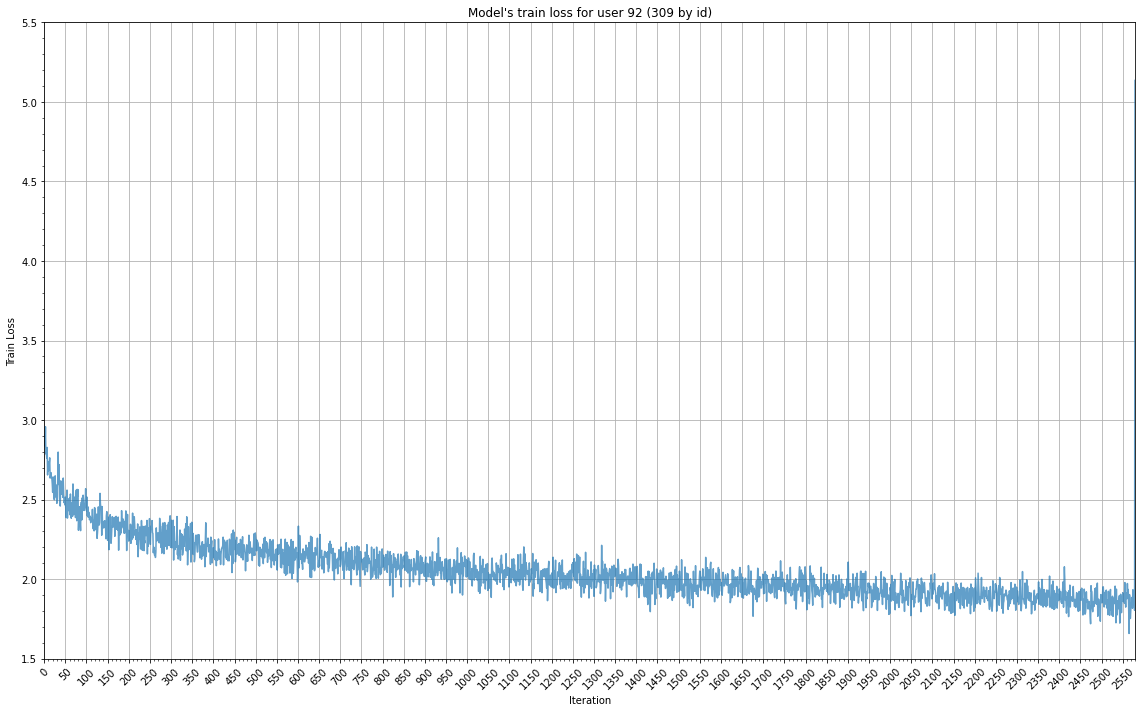

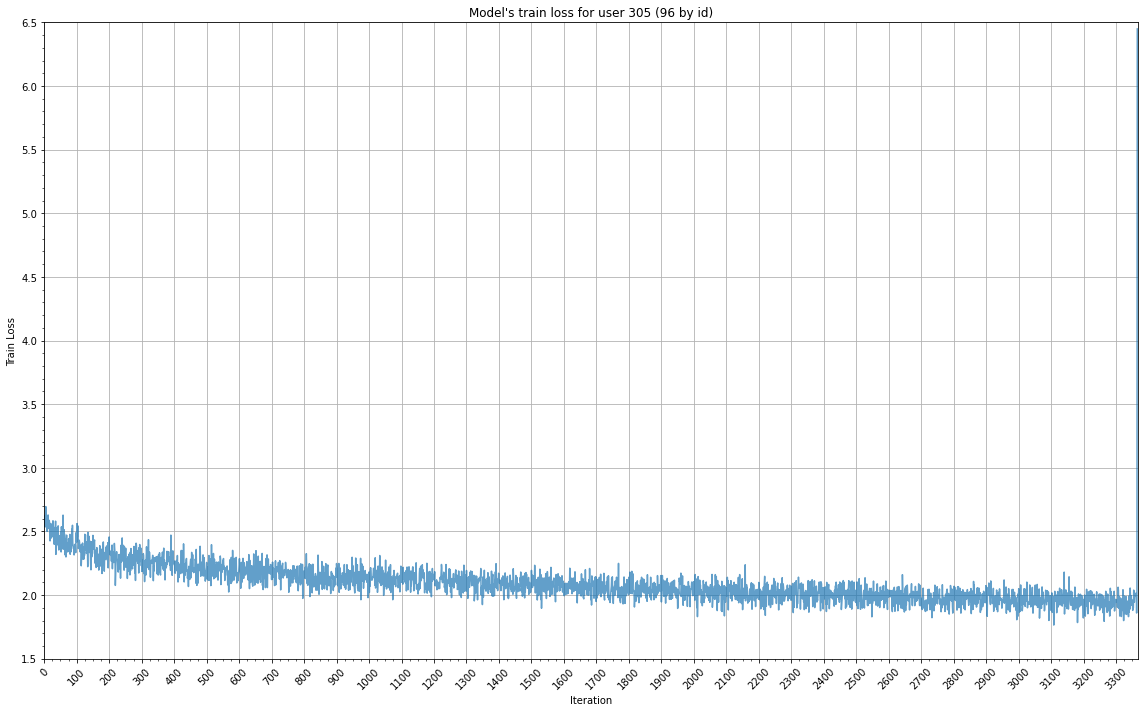

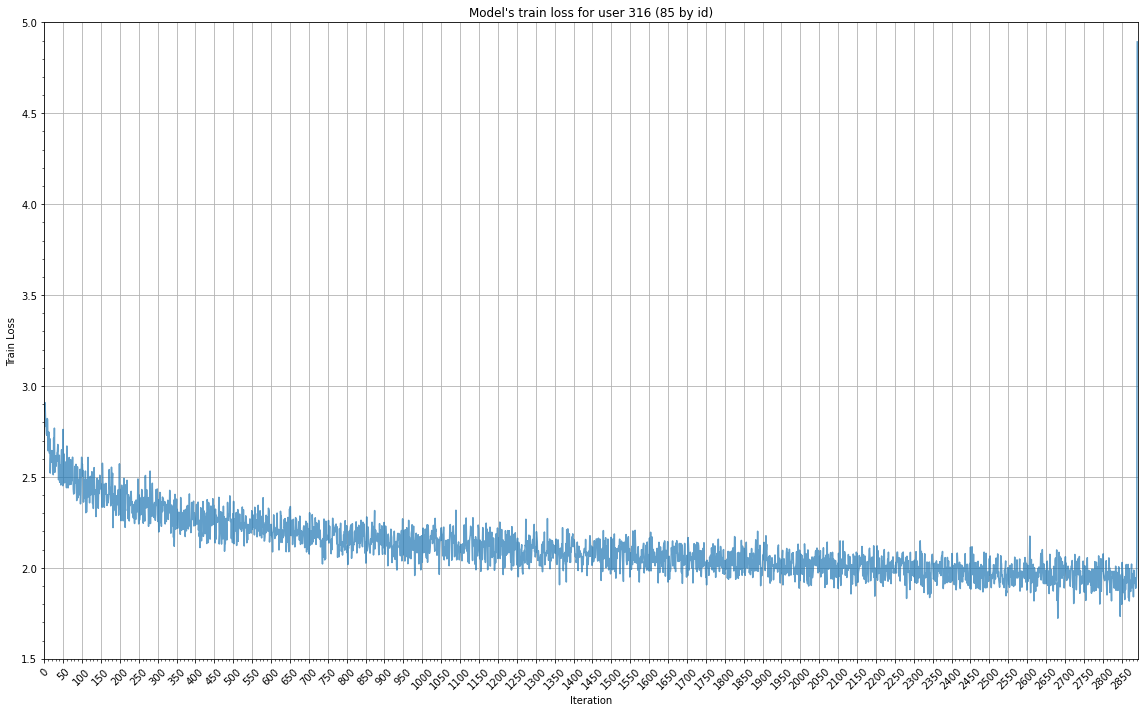

In [133]:
%matplotlib inline
for column in [92, 305, 316]:
    plot_single_train_loss(loss_df[column].dropna(), user_num = column)